In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [3]:
df.shape

(348, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


In [5]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


# Data Visualisation 

In [6]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.078566,0.132440,0.028685,-0.010839,-0.055474,0.317378
sex,-0.078566,1.000000,-0.023251,-0.006161,0.146923,-0.057304,0.098134
bmi,0.132440,-0.023251,1.000000,0.069632,0.018482,0.111163,0.210051
children,0.028685,-0.006161,0.069632,1.000000,-0.002561,-0.045782,0.069593
smoker,-0.010839,0.146923,0.018482,-0.002561,1.000000,0.023023,0.798537
region,-0.055474,-0.057304,0.111163,-0.045782,0.023023,1.000000,0.001551
charges,0.317378,0.098134,0.210051,0.069593,0.798537,0.001551,1.000000


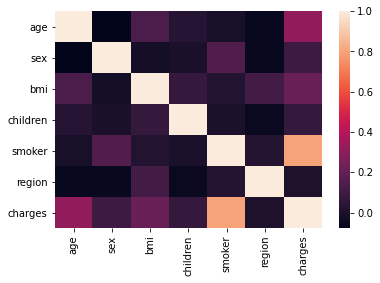

In [7]:
corr = df.corr()
ax = sns.heatmap(corr)

<AxesSubplot:xlabel='sex', ylabel='count'>

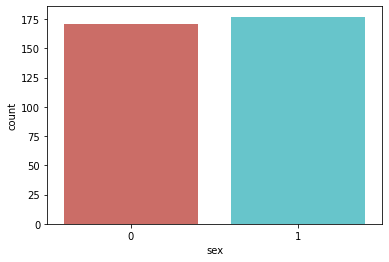

In [8]:
sns.countplot(x="sex",data=df,palette='hls')

<AxesSubplot:xlabel='smoker', ylabel='count'>

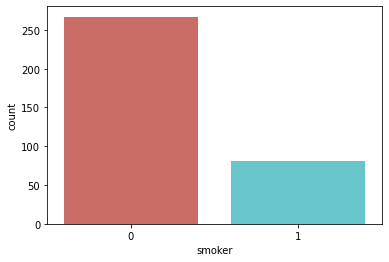

In [9]:
sns.countplot(x="smoker",data=df,palette='hls')

<AxesSubplot:xlabel='region', ylabel='count'>

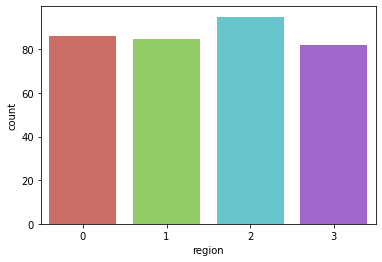

In [10]:
sns.countplot(x="region",data=df,palette='hls')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

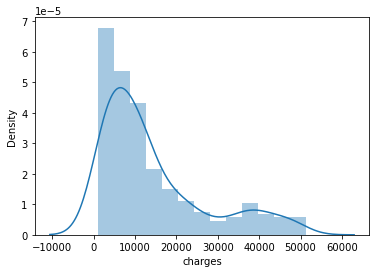

In [11]:
sns.distplot(df['charges'])

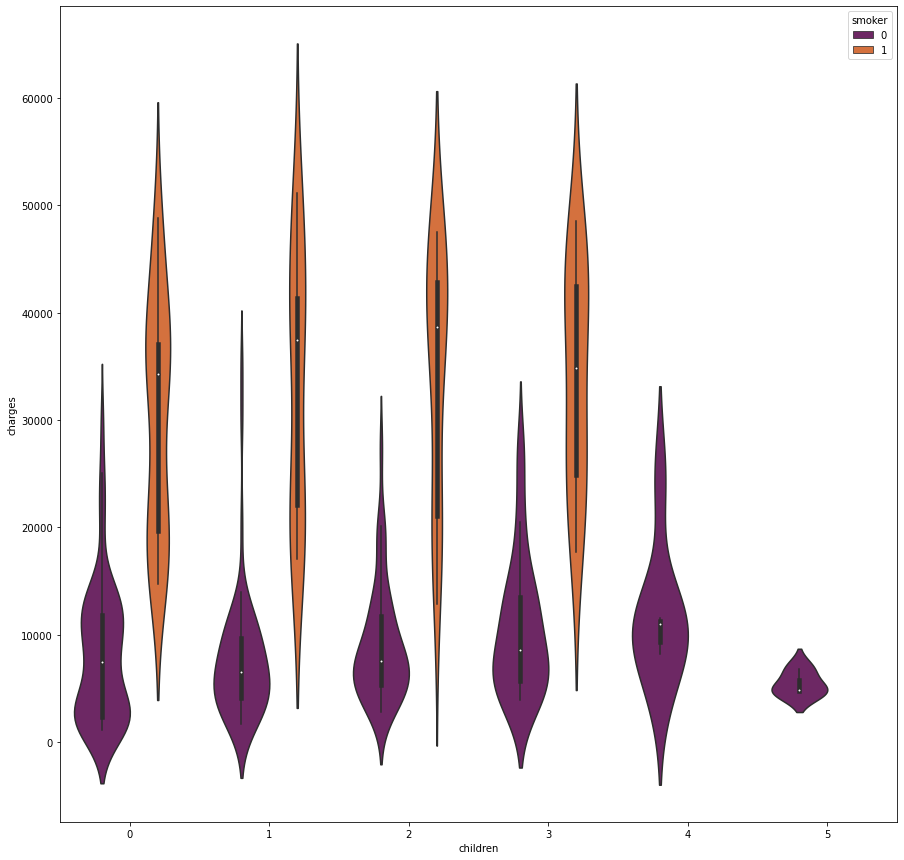

In [12]:
f, ax = plt.subplots(1, 1, figsize=(15, 15))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

# Splitting data into train and test 

In [13]:
x = df.iloc[:,:6]
x.head()
y = df.iloc[:,-1]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

## Multiple Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
multi_model = LinearRegression(normalize = True)
multi_model.fit(x_train, y_train)
y_pred = multi_model.predict(x_test)
acc_multi = (r2_score(y_test, y_pred)*100)
print(acc_multi)

79.41141924921811


## Lasso Regression Model 

In [17]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.01, normalize = True)
lasso_model.fit(x_train, y_train)
y_pred = lasso_model.predict(x_test) 
acc_lasso = (r2_score(y_test, y_pred)*100)
print(acc_lasso)

79.41211378512135


## Ridge Regression Model 

In [18]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.05, normalize = True)
ridge.fit(x_train,y_train)
y_pred = ridge.predict(x_test) 
acc_ridge = (r2_score(y_test, y_pred)*100)
print(acc_ridge)

79.74224923819463


## ElasticNet Regression Model 

In [20]:
from sklearn.linear_model import ElasticNet
enet_model = ElasticNet(alpha=0.01, l1_ratio=0.5, normalize=False)
enet_model.fit(x_train,y_train)
y_pred = enet_model.predict(x_test) 
acc_enet = (r2_score(y_test, y_pred)*100)
print(acc_enet)

79.42062184762355


## Decision Tree Regression Model 

In [21]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state = 0)
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
acc_dtree = (r2_score(y_test, y_pred)*100)
print(acc_dtree)

73.04728570656323


## Random Forest Regression Model 

In [22]:
from sklearn.ensemble import RandomForestRegressor
rdmf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rdmf.fit(x_train, y_train)
y_pred = rdmf.predict(x_test)
acc_rdmf = (r2_score(y_test, y_pred)*100)
print(acc_rdmf)

87.63872438250453


## Models :

In [23]:
models = pd.DataFrame({
    'Model': ['Multiple Regression Model','Lasso Regression Model','Ridge Regression Model','ElasticNet Regression Model', 
              'Decision Tree','Random Forest'],
    'Score': [ acc_multi,acc_lasso,acc_ridge,acc_enet, acc_dtree, 
              acc_rdmf]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Random Forest,87.638724
2,Ridge Regression Model,79.742249
3,ElasticNet Regression Model,79.420622
1,Lasso Regression Model,79.412114
0,Multiple Regression Model,79.411419
4,Decision Tree,73.047286


## Coclusion 

* From correlation matrix we can say that the people who smokes have to pay more charges. 
* Age of the person is also important factor for charges.
* Children , region and gender have less significant in insuarnce charges. 